Research Question: 
Are areas deemed safer based on their political voting patterns? Specifically, is it safer to live in a liberal state, such as California, compared to a conservative state, like Texas? Additionally, how do swing states, which do not lean strongly towards one political party, compare in terms of safety



The goal was to show a relationship between political voting and gate groups by comparing the hate group with the state voting data to note any shifts or trends regarding hate group presence or voting patterns.

*Southern Poverty Law Center Hate Map
The information on this map was compiled using a combination of social media platforms, news articles and tips submitted to the SPLC. 

*Census
*Election Data 

Limitations 


In [1]:
# scikit-learn: barebones, but fast and reliable
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier

# statsmodels: pretty and good to use, great for interpretable ML
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data processing
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('US Voting Patterns.csv')

# Subset the data for CA, TX, and FL
subset_df = df[df['State'].isin(['CA', 'TX', 'FL'])]

# Display the subset
usvote = subset_df
usvote.head()

,State,2000,2004,2008,2012,2016,2020
4,CA,1,1,1,1,1,1
9,FL,0,0,1,1,0,1
43,TX,0,0,0,0,0,0


In [3]:
# Pivot the DataFrame to make states the columns and years the rows
pivot_df = usvote.set_index('State').T

# Display the pivoted DataFrame
pivot_df


State,CA,FL,TX
2000,1,0,0
2004,1,0,0
2008,1,1,0
2012,1,1,0
2016,1,0,0
2020,1,1,0


In [4]:
dv = pd.read_csv('Diversity_Index.csv')
dv.head()

# Pivot the DataFrame to make states the columns and years the rows
pivot_dv = dv.set_index('State').T

# Display the pivoted DataFrame
pivot_dv


State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020,53.1,62.8,61.5,49.8,67.7,52.3,55.7,59.6,64.1,64.1,...,35.6,46.6,67.0,40.7,20.2,60.5,55.9,20.2,37.0,32.4
State.1,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2010,48.1,55.7,57.4,41.6,67.7,46.5,46.4,52.2,59.1,58.8,...,27.4,39.8,63.8,33.6,11.0,54.7,45.4,13.1,29.8,25.4


In [5]:
# List to store the DataFrames
datasets = []

# Loop to read CSV files from 2000 to 2023
for year in range(2000, 2024):
    # Create the file name dynamically
    file_name = f'Hate Groups {year}.csv'
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Append the DataFrame to the list
    datasets.append(df)
    
    # Print a confirmation message
    print(f"Data for {year} loaded into DataFrame.")

# Now 'datasets' contains DataFrames for each year from 2000 to 2023


Data for 2000 loaded into DataFrame.
Data for 2001 loaded into DataFrame.
Data for 2002 loaded into DataFrame.
Data for 2003 loaded into DataFrame.
Data for 2004 loaded into DataFrame.
Data for 2005 loaded into DataFrame.
Data for 2006 loaded into DataFrame.
Data for 2007 loaded into DataFrame.
Data for 2008 loaded into DataFrame.
Data for 2009 loaded into DataFrame.
Data for 2010 loaded into DataFrame.
Data for 2011 loaded into DataFrame.
Data for 2012 loaded into DataFrame.
Data for 2013 loaded into DataFrame.
Data for 2014 loaded into DataFrame.
Data for 2015 loaded into DataFrame.
Data for 2016 loaded into DataFrame.
Data for 2017 loaded into DataFrame.
Data for 2018 loaded into DataFrame.
Data for 2019 loaded into DataFrame.
Data for 2020 loaded into DataFrame.
Data for 2021 loaded into DataFrame.
Data for 2022 loaded into DataFrame.
Data for 2023 loaded into DataFrame.


In [6]:
# List to store the filtered DataFrames
filtered_datasets = []

# Loop to read CSV files from 2000 to 2023 and filter by states
for year in range(2000, 2024):
    # Create the file name dynamically
    file_name = f'Hate Groups {year}.csv'
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Filter the DataFrame to include only rows where the 'State' column is 'California', 'Florida', or 'Texas'
    filtered_df = df[df['State'].isin(['California', 'Florida', 'Texas'])]
    
    # Append the filtered DataFrame to the list
    filtered_datasets.append(filtered_df)
    
    # Print a confirmation message
    print(f"Data for {year} filtered and stored.")

# Now 'filtered_datasets' contains the filtered DataFrames for each year from 2000 to 2023


Data for 2000 filtered and stored.
Data for 2001 filtered and stored.
Data for 2002 filtered and stored.
Data for 2003 filtered and stored.
Data for 2004 filtered and stored.
Data for 2005 filtered and stored.
Data for 2006 filtered and stored.
Data for 2007 filtered and stored.
Data for 2008 filtered and stored.
Data for 2009 filtered and stored.
Data for 2010 filtered and stored.
Data for 2011 filtered and stored.
Data for 2012 filtered and stored.
Data for 2013 filtered and stored.
Data for 2014 filtered and stored.
Data for 2015 filtered and stored.
Data for 2016 filtered and stored.
Data for 2017 filtered and stored.
Data for 2018 filtered and stored.
Data for 2019 filtered and stored.
Data for 2020 filtered and stored.
Data for 2021 filtered and stored.
Data for 2022 filtered and stored.
Data for 2023 filtered and stored.


In [7]:
# Assuming 'filtered_datasets' contains all the filtered DataFrames
# Merge all the DataFrames into one by concatenating them
merged_df = pd.concat(filtered_datasets, axis=0, ignore_index=True)

# Print the merged DataFrame
print(merged_df)


                                      Title          City       State  \
0      American Knights of the Ku Klux Klan  Mauriceville       Texas   
1      American Knights of the Ku Klux Klan       Orlando     Florida   
2      American Knights of the Ku Klux Klan   San Antonio       Texas   
3        Aryan Covenant Church/ACC Services      Anderson       Texas   
4     Aryan Nations/Aryan National Alliance     Escondido  California   
...                                     ...           ...         ...   
4436                            Active Club   San Antonio       Texas   
4437                            Active Club           NaN       Texas   
4438         National Justice Party - Texas           NaN       Texas   
4439          New Columbia Movement - Texas           NaN       Texas   
4440                          Patriot Front           NaN       Texas   

              Group             Ideology Headquarters Statewide  Year  
0               NaN        Ku Klux Klan           N

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         4441 non-null   object
 1   City          3858 non-null   object
 2   State         4441 non-null   object
 3   Group         1350 non-null   object
 4   Ideology      3692 non-null   object
 5   Headquarters  474 non-null    object
 6   Statewide     571 non-null    object
 7   Year          4441 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 277.7+ KB


In [9]:
# List to store the counts for each dataset
state_counts = []

# List of states to count
states_of_interest = ['California', 'Florida', 'Texas']

# Loop to read CSV files from 2000 to 2023 and count state occurrences
for year in range(2000, 2024):
    # Create the file name dynamically
    file_name = f'Hate Groups {year}.csv'
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Initialize a dictionary to store counts for the states of interest
    count_dict = {state: 0 for state in states_of_interest}
    
    # Count occurrences for each state in the DataFrame
    for state in states_of_interest:
        count_dict[state] = df['State'].value_counts().get(state, 0)
    
    # Append the year and counts to the list
    state_counts.append({'Year': year, **count_dict})
    
    # Print a confirmation message
    print(f"State counts for {year} calculated.")

# Convert the list of dictionaries to a DataFrame
state_counts_df = pd.DataFrame(state_counts)

# Print the result
print(state_counts_df)


State counts for 2000 calculated.
State counts for 2001 calculated.
State counts for 2002 calculated.
State counts for 2003 calculated.
State counts for 2004 calculated.
State counts for 2005 calculated.
State counts for 2006 calculated.
State counts for 2007 calculated.
State counts for 2008 calculated.
State counts for 2009 calculated.
State counts for 2010 calculated.
State counts for 2011 calculated.
State counts for 2012 calculated.
State counts for 2013 calculated.
State counts for 2014 calculated.
State counts for 2015 calculated.
State counts for 2016 calculated.
State counts for 2017 calculated.
State counts for 2018 calculated.
State counts for 2019 calculated.
State counts for 2020 calculated.
State counts for 2021 calculated.
State counts for 2022 calculated.
State counts for 2023 calculated.
    Year  California  Florida  Texas
0   2000          29       38     38
1   2001          40       42     50
2   2002          48       44     48
3   2003          45       38     53

state_counts_df is the name of the dataset of each state crime per year

In [10]:
state_counts_df.head()

state_counts_df.to_csv('output_file.csv', index=False)

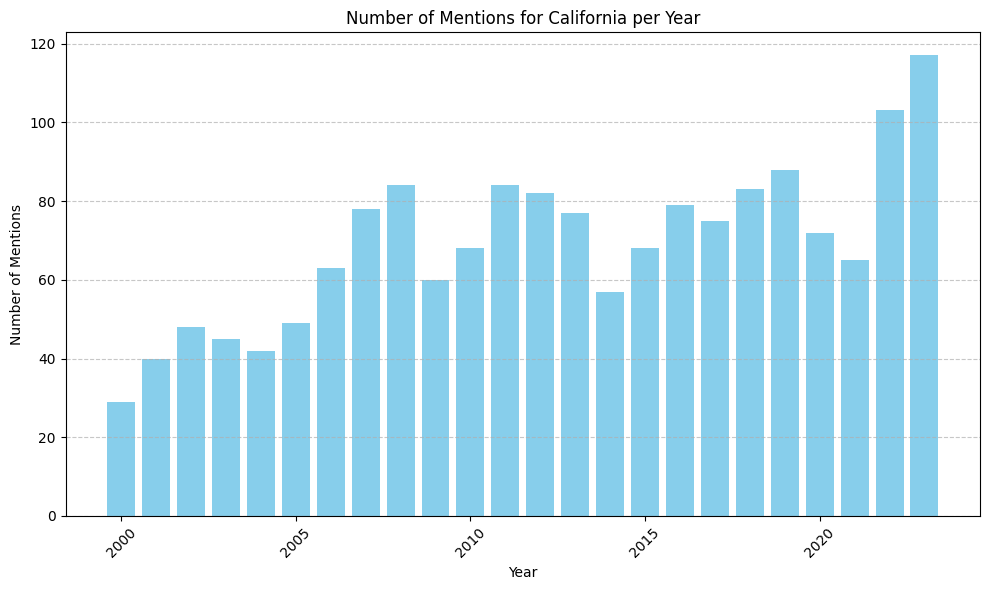

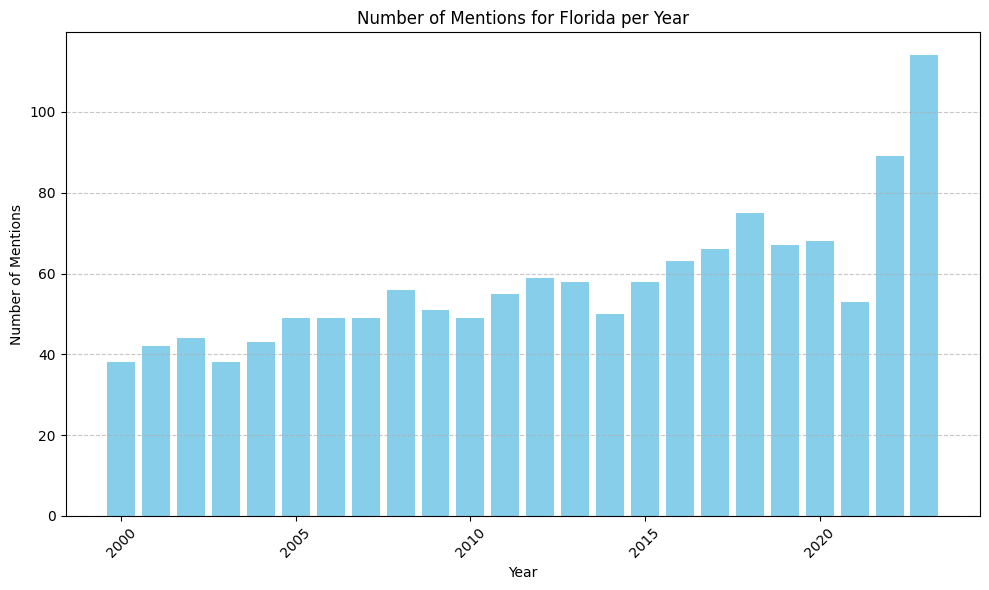

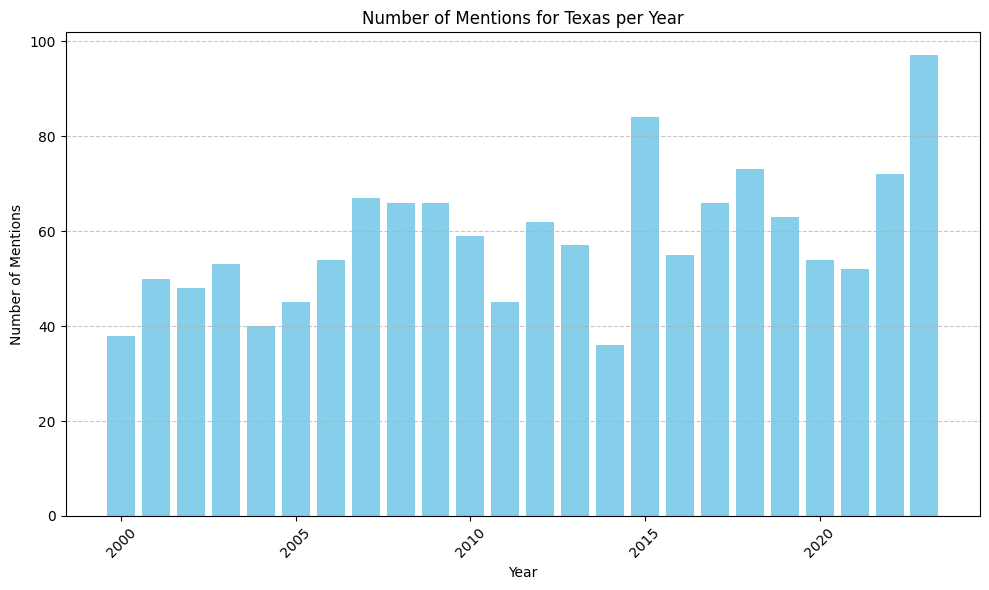

In [11]:
# Make sure 'Year' is the index
state_counts_df.set_index('Year', inplace=True)

# List of states to plot separately
states = ['California', 'Florida', 'Texas']

# Create separate plots for each state
for state in states:
    plt.figure(figsize=(10, 6))
    plt.bar(state_counts_df.index, state_counts_df[state], color='skyblue')
    plt.title(f'Number of Mentions for {state} per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()
    plt.show()


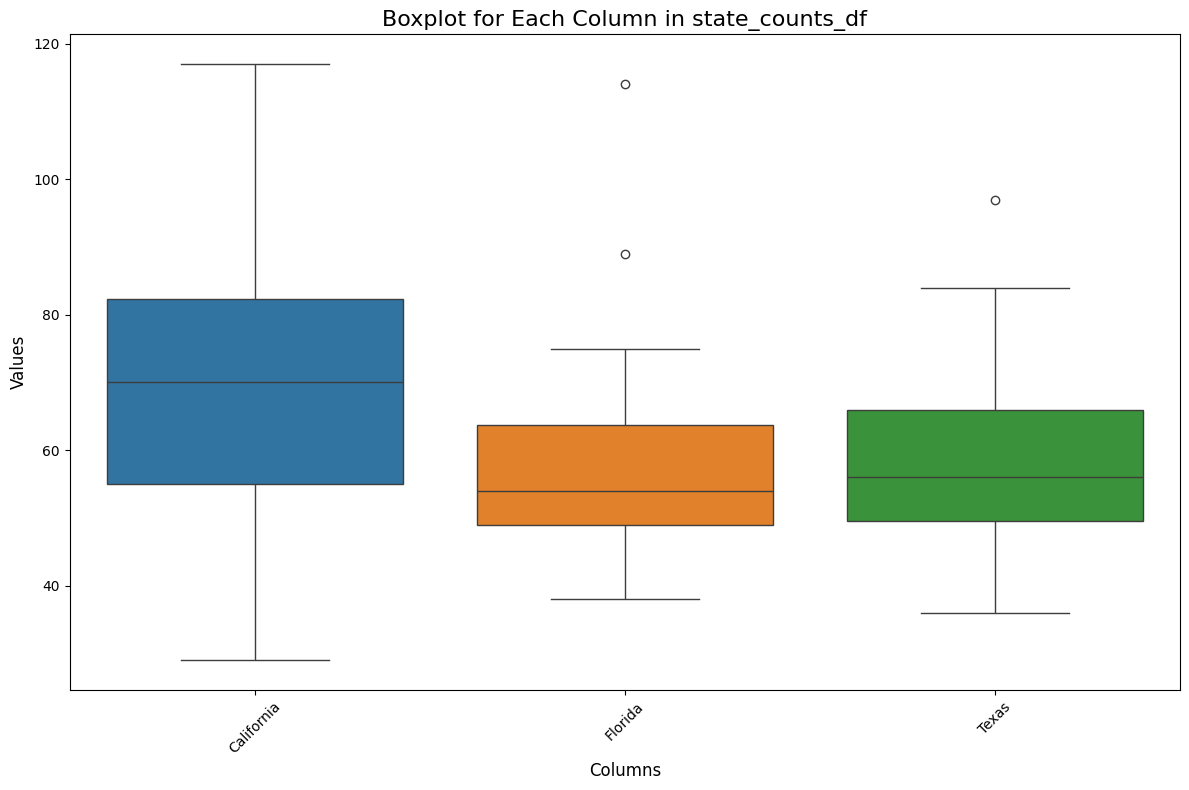

In [12]:
# Assuming state_counts_df is already defined as your DataFrame

# Set the size of the plots
plt.figure(figsize=(12, 8))

# Create a boxplot for each column in the DataFrame
sns.boxplot(data=state_counts_df)

# Add a title and labels
plt.title('Boxplot for Each Column in state_counts_df', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [13]:
# List to store the counts for each dataset
state_counts = []

# Loop to read CSV files from 2000 to 2023 and count state occurrences
for year in range(2000, 2024):
    # Create the file name dynamically
    file_name = f'Hate Groups {year}.csv'
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Get the count of occurrences for all states in the DataFrame
    state_count = df['State'].value_counts().to_dict()
    
    # Add the year to the dictionary of state counts
    state_count['Year'] = year
    
    # Append the year and counts to the list
    state_counts.append(state_count)
    
    # Print a confirmation message
    print(f"State counts for {year} calculated.")

# Convert the list of dictionaries to a DataFrame
all_state_counts_df = pd.DataFrame(state_counts)

# Fill NaN values with 0 (in case some states are missing in some years)
all_state_counts_df = all_state_counts_df.fillna(0)

# Print the result
print(all_state_counts_df)

State counts for 2000 calculated.
State counts for 2001 calculated.
State counts for 2002 calculated.
State counts for 2003 calculated.
State counts for 2004 calculated.
State counts for 2005 calculated.
State counts for 2006 calculated.
State counts for 2007 calculated.
State counts for 2008 calculated.
State counts for 2009 calculated.
State counts for 2010 calculated.
State counts for 2011 calculated.
State counts for 2012 calculated.
State counts for 2013 calculated.
State counts for 2014 calculated.
State counts for 2015 calculated.
State counts for 2016 calculated.
State counts for 2017 calculated.
State counts for 2018 calculated.
State counts for 2019 calculated.
State counts for 2020 calculated.
State counts for 2021 calculated.
State counts for 2022 calculated.
State counts for 2023 calculated.
    Alabama  Texas  Florida  Georgia  California  Mississippi  Pennsylvania  \
0        38     38       38       30          29           27            27   
1        35     50       4

In [14]:
print(all_state_counts_df.columns)
all_state_counts_df.head()

Index(['Alabama', 'Texas', 'Florida', 'Georgia', 'California', 'Mississippi',
       'Pennsylvania', 'North Carolina', 'Ohio', 'Virginia', 'New York',
       'Louisiana', 'Arkansas', 'Indiana', 'Missouri', 'Illinois', 'Michigan',
       'Tennessee', 'New Jersey', 'South Carolina', 'Washington', 'Idaho',
       'Arizona', 'Kentucky', 'Nevada', 'Minnesota', 'Wisconsin', 'Maryland',
       'Colorado', 'Massachusetts', 'Nebraska', 'Oklahoma', 'Oregon',
       'Montana', 'Kansas', 'New Mexico', 'West Virginia',
       'District of Columbia', 'Utah', 'Connecticut', 'Delaware', 'Iowa',
       'South Dakota', 'Maine', 'North Dakota', 'Hawaii', 'Wyoming', 'Alaska',
       'Year', 'Rhode Island', 'New Hampshire', 'Vermont'],
      dtype='object')


,Alabama,Texas,Florida,Georgia,California,Mississippi,Pennsylvania,North Carolina,Ohio,Virginia,...,South Dakota,Maine,North Dakota,Hawaii,Wyoming,Alaska,Year,Rhode Island,New Hampshire,Vermont
0,38,38,38,30,29,27,27,26,26,26,...,1.0,1.0,1.0,1.0,1,1.0,2000,0.0,0.0,0.0
1,35,50,42,30,40,40,25,23,28,29,...,1.0,0.0,1.0,1.0,1,4.0,2001,1.0,1.0,0.0
2,34,48,44,31,48,26,22,31,26,25,...,1.0,1.0,1.0,0.0,3,1.0,2002,1.0,2.0,0.0
3,24,53,38,54,45,27,29,33,33,25,...,0.0,1.0,1.0,1.0,3,1.0,2003,2.0,2.0,0.0
4,27,40,43,41,42,26,31,37,31,29,...,0.0,2.0,0.0,0.0,3,2.0,2004,1.0,1.0,1.0


In [15]:
# Load the datasets
diversity_index_df = pd.read_csv('Diversity_Index.csv')
hate_groups_df = all_state_counts_df

# Display the first few rows of each dataframe to understand the structure
diversity_index_df.head(), hate_groups_df.head()

(        State  2020     State.1  2010
 0     Alabama  53.1     Alabama  48.1
 1      Alaska  62.8      Alaska  55.7
 2     Arizona  61.5     Arizona  57.4
 3    Arkansas  49.8    Arkansas  41.6
 4  California  67.7  California  67.7,
    Alabama  Texas  Florida  Georgia  California  Mississippi  Pennsylvania  \
 0       38     38       38       30          29           27            27   
 1       35     50       42       30          40           40            25   
 2       34     48       44       31          48           26            22   
 3       24     53       38       54          45           27            29   
 4       27     40       43       41          42           26            31   
 
    North Carolina  Ohio  Virginia  ...  South Dakota  Maine  North Dakota  \
 0              26    26        26  ...           1.0    1.0           1.0   
 1              23    28        29  ...           1.0    0.0           1.0   
 2              31    26        25  ...           1.0  

In [16]:
# Transpose the DataFrame so that rows become columns and vice versa
hate_groups_df_transposed = hate_groups_df.transpose()

# Print the transposed DataFrame
print(hate_groups_df_transposed)


                          0       1       2       3       4       5       6   \
Alabama                 38.0    35.0    34.0    24.0    27.0    22.0    22.0   
Texas                   38.0    50.0    48.0    53.0    40.0    45.0    54.0   
Florida                 38.0    42.0    44.0    38.0    43.0    49.0    49.0   
Georgia                 30.0    30.0    31.0    54.0    41.0    41.0    44.0   
California              29.0    40.0    48.0    45.0    42.0    49.0    63.0   
Mississippi             27.0    40.0    26.0    27.0    26.0    27.0    28.0   
Pennsylvania            27.0    25.0    22.0    29.0    31.0    30.0    27.0   
North Carolina          26.0    23.0    31.0    33.0    37.0    35.0    33.0   
Ohio                    26.0    28.0    26.0    33.0    31.0    33.0    31.0   
Virginia                26.0    29.0    25.0    25.0    29.0    31.0    31.0   
New York                23.0    19.0    25.0    24.0    21.0    19.0    24.0   
Louisiana               19.0    17.0    

In [17]:
# Reset index to turn row indices into a column
hate_groups_df_transposed = hate_groups_df_transposed.reset_index()

# Rename the new column to 'State'
hate_groups_df_transposed.columns = ['State'] + list(hate_groups_df_transposed.columns[1:])

# Print the transposed DataFrame
print(hate_groups_df_transposed)

                   State       0       1       2       3       4       5  \
0                Alabama    38.0    35.0    34.0    24.0    27.0    22.0   
1                  Texas    38.0    50.0    48.0    53.0    40.0    45.0   
2                Florida    38.0    42.0    44.0    38.0    43.0    49.0   
3                Georgia    30.0    30.0    31.0    54.0    41.0    41.0   
4             California    29.0    40.0    48.0    45.0    42.0    49.0   
5            Mississippi    27.0    40.0    26.0    27.0    26.0    27.0   
6           Pennsylvania    27.0    25.0    22.0    29.0    31.0    30.0   
7         North Carolina    26.0    23.0    31.0    33.0    37.0    35.0   
8                   Ohio    26.0    28.0    26.0    33.0    31.0    33.0   
9               Virginia    26.0    29.0    25.0    25.0    29.0    31.0   
10              New York    23.0    19.0    25.0    24.0    21.0    19.0   
11             Louisiana    19.0    17.0    20.0    26.0    27.0    28.0   
12          

In [18]:
merged_df = pd.merge(hate_groups_df_transposed, diversity_index_df, on='State', how='inner')

# Print the merged DataFrame
print(merged_df)
merged_df.to_csv('output_file.csv', index=False)

             State     0     1     2     3     4     5     6     7     8  ...  \
0          Alabama  38.0  35.0  34.0  24.0  27.0  22.0  22.0  24.0  36.0  ...   
1            Texas  38.0  50.0  48.0  53.0  40.0  45.0  54.0  67.0  66.0  ...   
2          Florida  38.0  42.0  44.0  38.0  43.0  49.0  49.0  49.0  56.0  ...   
3          Georgia  30.0  30.0  31.0  54.0  41.0  41.0  44.0  42.0  40.0  ...   
4       California  29.0  40.0  48.0  45.0  42.0  49.0  63.0  78.0  84.0  ...   
5      Mississippi  27.0  40.0  26.0  27.0  26.0  27.0  28.0  28.0  22.0  ...   
6     Pennsylvania  27.0  25.0  22.0  29.0  31.0  30.0  27.0  33.0  37.0  ...   
7   North Carolina  26.0  23.0  31.0  33.0  37.0  35.0  33.0  28.0  30.0  ...   
8             Ohio  26.0  28.0  26.0  33.0  31.0  33.0  31.0  28.0  23.0  ...   
9         Virginia  26.0  29.0  25.0  25.0  29.0  31.0  31.0  34.0  26.0  ...   
10        New York  23.0  19.0  25.0  24.0  21.0  19.0  24.0  26.0  24.0  ...   
11       Louisiana  19.0  17

In [19]:
df_cleaned = merged_df.drop(columns=["State.1","State", "2010", "2020"])

In [20]:
print(df_cleaned.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='object')


          0         1         2         3         4         5         6   \
0   1.000000  0.933507  0.907483  0.869069  0.873918  0.867978  0.857525   
1   0.933507  1.000000  0.959517  0.920399  0.920345  0.919798  0.921966   
2   0.907483  0.959517  1.000000  0.946728  0.952288  0.952822  0.957299   
3   0.869069  0.920399  0.946728  1.000000  0.964235  0.957410  0.958988   
4   0.873918  0.920345  0.952288  0.964235  1.000000  0.988321  0.962749   
5   0.867978  0.919798  0.952822  0.957410  0.988321  1.000000  0.980784   
6   0.857525  0.921966  0.957299  0.958988  0.962749  0.980784  1.000000   
7   0.840308  0.912584  0.941275  0.929525  0.921984  0.948781  0.982616   
8   0.821556  0.888136  0.929360  0.902020  0.909936  0.930255  0.961636   
9   0.846890  0.892763  0.923292  0.910484  0.914009  0.928744  0.954522   
10  0.867327  0.897568  0.902858  0.890922  0.904968  0.925370  0.949685   
11  0.856296  0.868912  0.888507  0.902142  0.899570  0.913191  0.942122   
12  0.853880

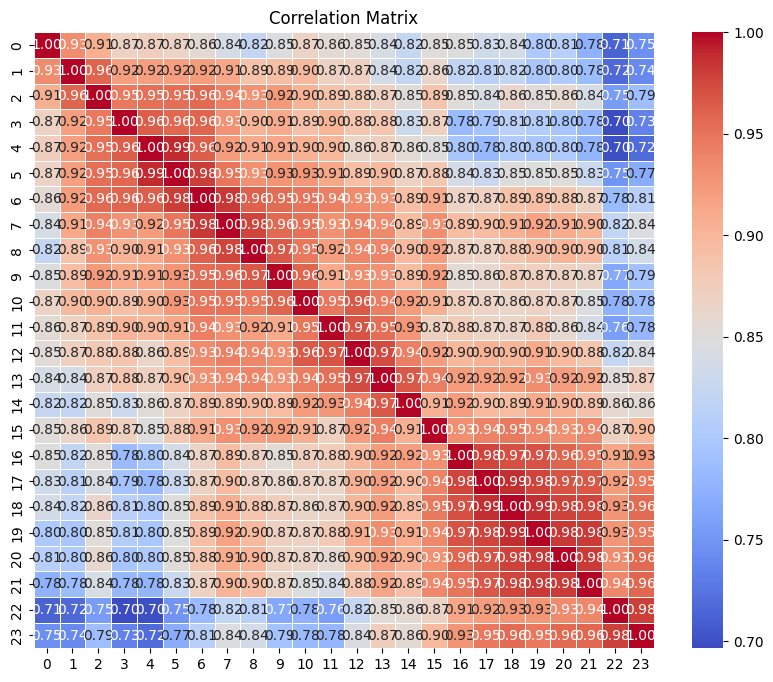

In [21]:
# Perform correlation analysis
correlation_matrix = df_cleaned.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [22]:
# Extract row 4 (use .iloc to index rows)
row_4 = df_cleaned.iloc[4, 1:]  # Skipping the 'State' column

# Compute correlation between row 4 and all other rows (excluding 'State' column)
correlations_with_row_4 = df_cleaned.iloc[:, 1:].apply(lambda row: row.corr(row_4), axis=1)

# Display the correlations of row 4 with other rows
print(correlations_with_row_4)


0    -0.316784
1     0.706360
2     0.870863
3     0.168719
4     1.000000
5    -0.498568
6     0.797364
7     0.570777
8     0.581317
9     0.694271
10    0.785955
11   -0.536606
12   -0.197960
13    0.788305
14    0.427593
15    0.780536
16    0.665792
17    0.601986
18   -0.023145
19   -0.374093
20    0.760361
21    0.695164
22    0.870259
23    0.333066
24    0.429611
25    0.803844
26    0.641349
27    0.823495
28    0.855031
29    0.297939
30    0.653280
31    0.384415
32    0.782651
33    0.721352
34    0.127350
35    0.508541
36    0.166701
37    0.768002
38    0.545006
39    0.423205
40    0.360281
41    0.785074
42    0.761584
43    0.738191
44    0.636573
45    0.403363
46    0.315068
47    0.669641
48    0.801010
49    0.516163
dtype: float64


In [23]:
row_fl = df_cleaned.iloc[2]
row_fl.head()
row_ca = df_cleaned.iloc[4]
row_ca.head()
row_tx = df_cleaned.iloc[1]
row_tx.head()

0    38.0
1    50.0
2    48.0
3    53.0
4    40.0
Name: 1, dtype: float64

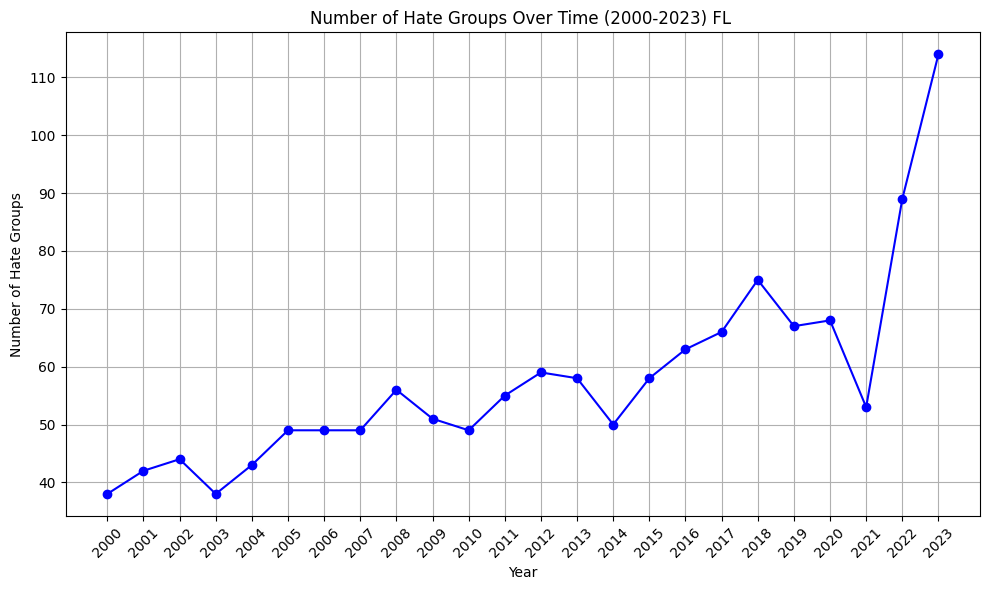

In [24]:
years = list(range(2000, 2024))
hate_groups = row_fl 
plt.figure(figsize=(10, 6))
plt.plot(years, hate_groups, marker='o', linestyle='-', color='b')
plt.title('Number of Hate Groups Over Time (2000-2023) FL ')
plt.xlabel('Year')
plt.ylabel('Number of Hate Groups')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

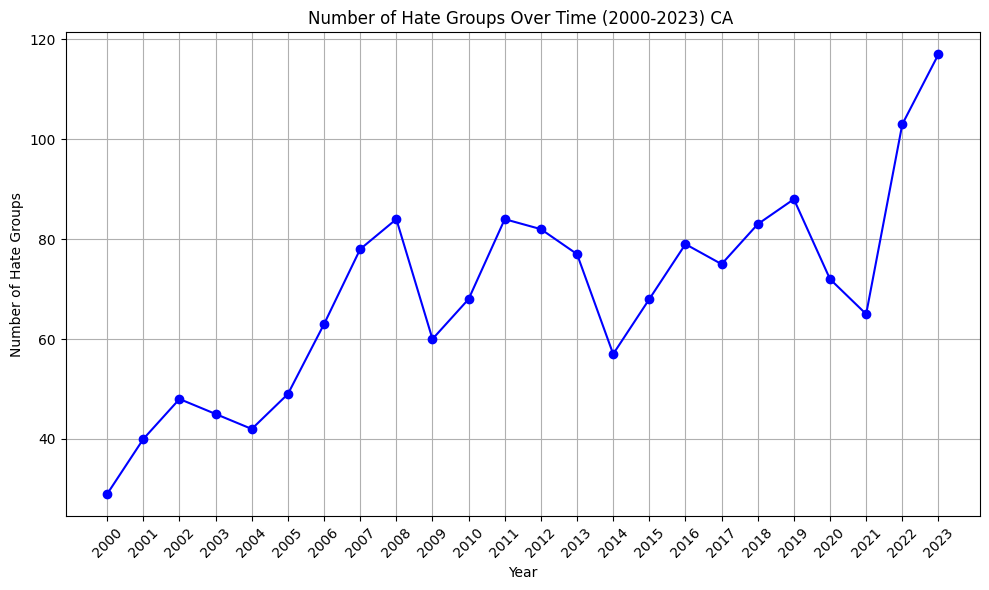

In [25]:
years = list(range(2000, 2024))
hate_groups = row_ca 
plt.figure(figsize=(10, 6))
plt.plot(years, hate_groups, marker='o', linestyle='-', color='b')
plt.title('Number of Hate Groups Over Time (2000-2023) CA ')
plt.xlabel('Year')
plt.ylabel('Number of Hate Groups')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


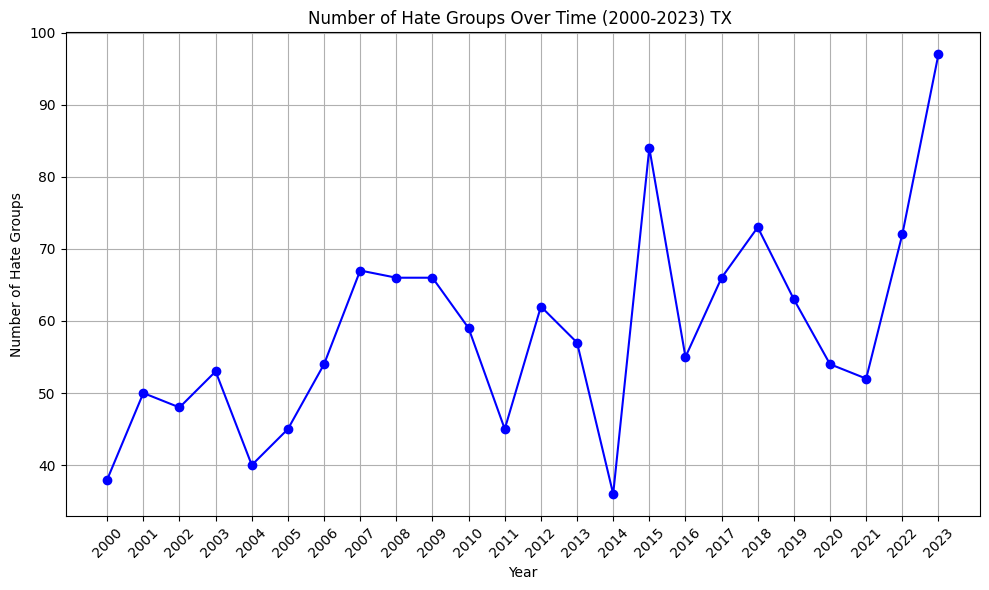

In [26]:
years = list(range(2000, 2024))
hate_groups = row_tx 
plt.figure(figsize=(10, 6))
plt.plot(years, hate_groups, marker='o', linestyle='-', color='b')
plt.title('Number of Hate Groups Over Time (2000-2023) TX ')
plt.xlabel('Year')
plt.ylabel('Number of Hate Groups')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()



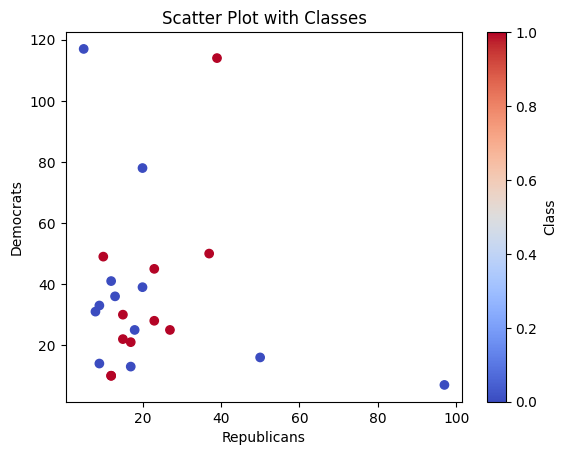

In [27]:
y = [39, 117, 30, 14, 114, 49, 25, 31, 10, 25, 13, 36, 22, 16, 21, 45, 41, 28, 50, 7, 78, 10, 33]  # (dem)
x = [20, 5, 15, 9, 39, 10, 18, 8, 12, 27, 17, 13, 15, 50, 17, 23, 12, 23, 37, 97, 20, 12, 9]  # (rep)

# Assuming two classes (0 and 1), we create a list with a length equal to x and y
classes = [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]

# Plot
plt.scatter(x, y, c=classes, cmap='coolwarm')  # 'coolwarm' color map for two classes
plt.colorbar(label='Class')  # Add color bar to represent classes
plt.title('Scatter Plot with Classes')
plt.xlabel('Republicans')
plt.ylabel('Democrats')

plt.show()



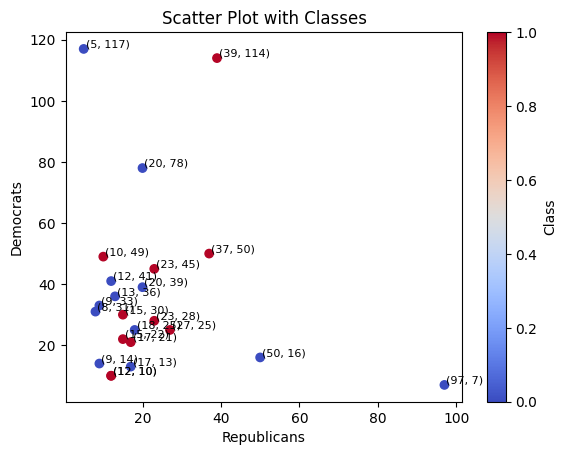

In [28]:
# Data
y = [39, 117, 30, 14, 114, 49, 25, 31, 10, 25, 13, 36, 22, 16, 21, 45, 41, 28, 50, 7, 78, 10, 33]  # (dem)
x = [20, 5, 15, 9, 39, 10, 18, 8, 12, 27, 17, 13, 15, 50, 17, 23, 12, 23, 37, 97, 20, 12, 9]  # (rep)

# Assuming two classes (0 and 1), we create a list with a length equal to x and y
classes = [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]

# Plot
plt.scatter(x, y, c=classes, cmap='coolwarm')  # 'coolwarm' color map for two classes
plt.colorbar(label='Class')  # Add color bar to represent classes

# Add labels for each point
for i in range(len(x)):
    plt.text(x[i] + 0.5, y[i] + 0.5, f'({x[i]}, {y[i]})', fontsize=8)

plt.title('Scatter Plot with Classes')
plt.xlabel('Republicans')
plt.ylabel('Democrats')

plt.show()
